In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pyarrow
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Projet_DA_Co2/Stéphane LABLE - Draft/LABLE_Co2_2024_Clean_V2.1.parquet')
df.head(2)

OSError: [Errno 107] Transport endpoint is not connected

In [ ]:
df.head(10)

,ID,Country,Constructeur,Model,WLTP_poids,Co2_Emission(WLTP),Type_Carburant,Puissance_KW,Conso_Wh/km,IT,Erwltp (g/km),Fuel consumption,Electric range (km),Pays,Puissance_CV
0,148534149,NL,FORD,FOCUS,1523.0,121.0,petrol,92.0,0.0,E13 32 37,2.10,5.3,0.0,Netherlands,125.12
1,148534150,NL,OPEL,VIVARO,2454.0,0.0,electric,100.0,244.0,N/C,0.00,0.0,343.0,Netherlands,136.00
2,148534151,NL,VOLVO,S60,2176.0,16.0,petrol/electric,186.0,163.0,N/C,0.00,0.7,93.0,Netherlands,252.96
3,148534152,NL,FORD,FOCUS,1549.0,123.0,petrol,92.0,0.0,E13 32 37,2.10,5.4,0.0,Netherlands,125.12
4,148534153,NL,TOYOTA,TOYOTA AYGO X,1088.0,108.0,petrol,53.0,0.0,N/C,0.00,4.8,0.0,Netherlands,72.08
5,148534154,NL,DACIA,SANDERO,1262.0,125.0,petrol,81.0,0.0,E19 29 37,1.88,5.5,0.0,Netherlands,110.16
6,148534155,NL,VOLKSWAGEN,TIGUAN,2033.0,10.0,petrol/electric,110.0,178.0,N/C,0.00,0.4,117.0,Netherlands,149.60
7,148534156,NL,VOLKSWAGEN,TAIGO,1335.0,125.0,petrol,70.0,0.0,E13 29,1.18,5.6,0.0,Netherlands,95.20
8,148534157,NL,VOLVO,C40,2203.0,0.0,electric,185.0,166.0,N/C,0.00,0.0,570.0,Netherlands,251.60
9,148534158,NL,VOLVO,XC60,2272.0,22.0,petrol/electric,186.0,182.0,N/C,0.00,0.9,82.0,Netherlands,252.96


Comparatif France et Norvège

In [ ]:
df_ev_fr_no = df_ev[df_ev["Pays"].isin(["France", "Norway"])]
df_ev_fr_no["Pays"].value_counts()

,count
Pays,
France,450200
Norway,117880


In [ ]:
df_ev_fr_no.groupby("Pays")["WLTP_poids"].describe()

,count,mean,std,min,25%,50%,75%,max
Pays,,,,,,,,
France,450200.0,1963.352903,359.600004,841.0,1699.0,1933.0,2159.0,3251.0
Norway,117571.0,2201.193151,247.271607,1144.0,2021.0,2171.0,2381.0,3320.0


In [ ]:
df_ev_fr_no.groupby("Pays")["Poids_Quartile"].value_counts(normalize=True).unstack()

Poids_Quartile,Q1_Léger,Q2_Moyen,Q3_Lourd,Q4_Trèslourd
Pays,,,,
France,0.061724,0.015980,0.342550,0.579747
Norway,0.000042,0.001128,0.090346,0.908483


In [ ]:
df_ev[df_ev["Pays"] == "France"]["Constructeur"].value_counts().head(20)

,count
Constructeur,
PEUGEOT,56435
RENAULT,52286
TESLA,40758
BMW,34585
MERCEDES-BENZ,30548
VOLKSWAGEN,23077
AUDI,19361
FIAT,19234
CITROËN,18782


In [ ]:
df_ev[df_ev["Pays"] == "Norway"]["Constructeur"].value_counts().head(20)

,count
Constructeur,
TESLA,24255
VOLKSWAGEN,13455
VOLVO,11072
TOYOTA,7345
BMW,6846
HYUNDAI,5782
AUDI,5443
NISSAN,5380
SKODA,5146


Norvège

Le marché électrique norvégien est très avancé et dominé par des modèles premium (Tesla, Audi e-tron, Volvo XC40/XC60, BMW i4/iX). Ces véhicules dépassent fréquemment les 2 tonnes.
La répartition des poids montre une surreprésentation massive en Q4 (quartile des véhicules les plus lourds) et très peu de modèles en Q1 ou Q2.
Cela reflète :

une forte préférence pour les SUV et crossovers électriques,

un pouvoir d’achat élevé,

des infrastructures de recharge adaptées aux véhicules lourds.

France

Le marché électrique français repose principalement sur des modèles plus légers : Renault Zoé, Peugeot e-208/e-2008, Dacia Spring, Citroën ë-C4.
Ces véhicules se situent majoritairement entre 1200 et 1600 kg.
On observe une distribution plus équilibrée entre Q2 et Q3, une part de Q4 nettement plus faible qu’en Norvège, et une présence notable de Q1 pour les petites citadines électriques.

In [ ]:
df_ev[["WLTP_poids", "Electric range (km)"]].corr()

,WLTP_poids,Electric range (km)
WLTP_poids,1.000000,0.059025
Electric range (km),0.059025,1.000000


Très faible corrélation entre le poids et l'autonomie du véhicule hybride. On pourrait penser que le véhicule lourd a de grandes batteries et donc une meilleur autonomie : sauf que c'est son poids fait que sa consommation augmente.

In [ ]:
df_ev[["WLTP_poids", "Puissance_KW"]].corr()

,WLTP_poids,Puissance_KW
WLTP_poids,1.000000,0.507986
Puissance_KW,0.507986,1.000000


Une corrélation est beaucoup plus notable entre poids et puissance. Pour faire avancer le véhicule électrique premium, il faut une puissance plus importante car le véhicule est plus lourd.

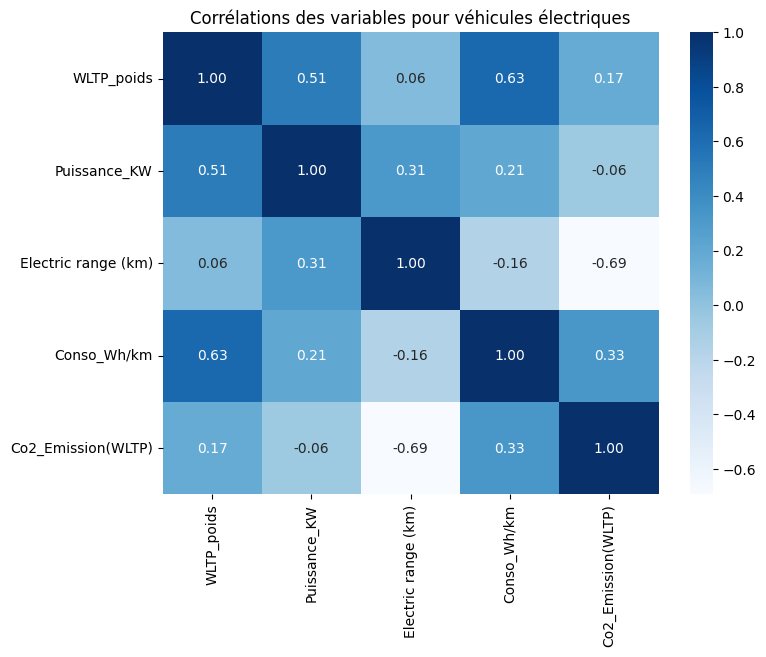

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vars_corr = [
    "WLTP_poids",
    "Puissance_KW",
    "Electric range (km)",
    "Conso_Wh/km",
    "Co2_Emission(WLTP)"
]

corr_matrix = df_ev[vars_corr].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("Corrélations des variables pour véhicules électriques")
plt.show()

La matrice de corrélation montre que, pour les véhicules électriques, le poids est fortement corrélé à la puissance (r = 0.51) et à la consommation énergétique (r = 0.63), ce qui souligne que les modèles les plus lourds sont à la fois plus puissants et moins efficients.
En revanche, le poids n’a quasiment aucun impact sur l’autonomie (r = 0.06), ce qui suggère que les batteries plus grandes compensent la masse supplémentaire.
La consommation énergétique est faiblement liée à l’autonomie (r = –0.16), ce qui confirme que l’autonomie dépend d’autres facteurs clés non présents dans le dataset (capacité de batterie, aérodynamisme ?).
Enfin, la relation négative entre autonomie et émissions WLTP est liée au fait que les véhicules électriques ont des émissions locales nulles, contrairement aux modèles hybrides ou thermiques résiduels présents dans la base.

Les grosses voitures électriques sont donc construites pour la puissance et non pour l'autonomie ni pour la consommation électrique.
